In [27]:
import os

from einops import rearrange
import numpy as np
import skimage
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

In [17]:
def preprocess(img):
    if img.shape[-1] == 4:
        img = img[..., :-1]

    if img.dtype == np.uint8:
        img = img.astype(np.float32)
        img /= 255.
    return img

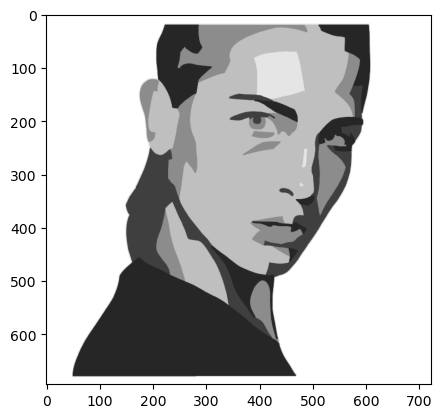

In [18]:
source = skimage.io.imread('/Users/erikstorrs/Downloads/all.png')
source = preprocess(source)
plt.imshow(source)

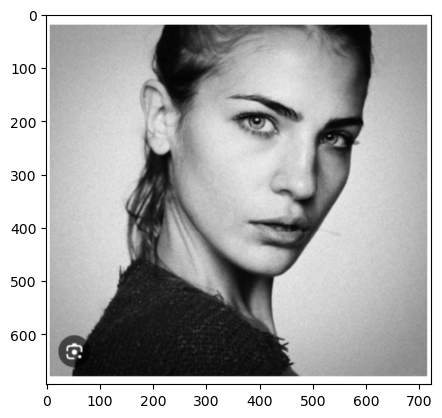

In [19]:
target = skimage.io.imread('/Users/erikstorrs/Downloads/target.png')
target = preprocess(target)
plt.imshow(target)

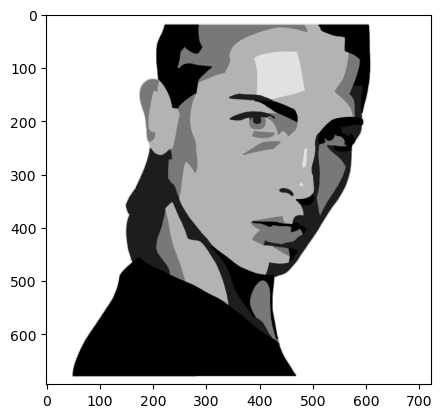

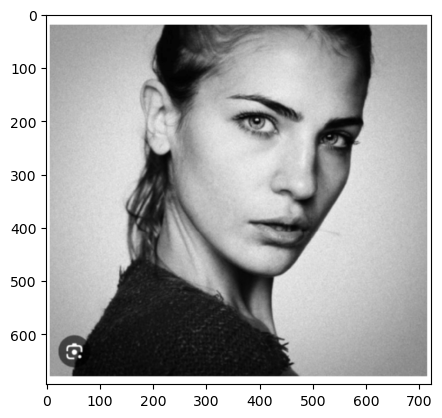

In [20]:
source_bw = skimage.color.rgb2gray(source)
target_bw = skimage.color.rgb2gray(target)

plt.imshow(source_bw, cmap='gray')
plt.show()
plt.imshow(target_bw, cmap='gray')
plt.show()

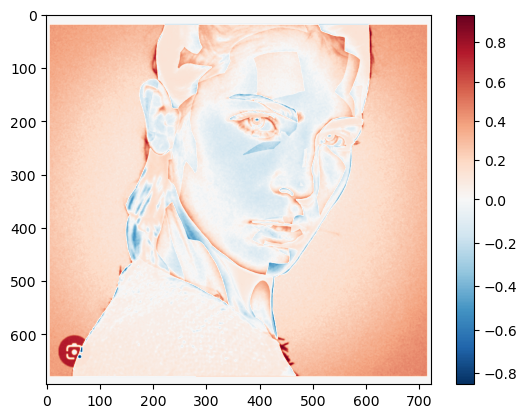

In [28]:
deltas =  source_bw - target_bw

norm = TwoSlopeNorm(vmin=deltas.min(), vcenter=0., vmax=deltas.max())

plt.imshow(deltas, cmap='RdBu_r', norm=norm)
plt.colorbar()